LECTURE 48: Histograms

In [7]:
#Essentials
import numpy as np
from numpy.random import randn
import pandas as pd

#Stats library

#plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
#import seaborn as sns

%matplotlib inline

In [8]:
dataset1 = randn(100)
dataset2 = randn(80)

(array([ 1.,  1., 11., 12., 20., 20., 17.,  9.,  5.,  4.]),
 array([-2.70845024, -2.18396352, -1.6594768 , -1.13499008, -0.61050336,
        -0.08601664,  0.43847009,  0.96295681,  1.48744353,  2.01193025,
         2.53641697]),
 <a list of 10 Patch objects>)

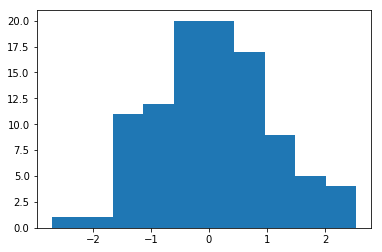

In [9]:
plt.hist(dataset1)

(array([ 1.,  1., 11., 12., 20., 20., 17.,  9.,  5.,  4.]),
 array([-2.70845024, -2.18396352, -1.6594768 , -1.13499008, -0.61050336,
        -0.08601664,  0.43847009,  0.96295681,  1.48744353,  2.01193025,
         2.53641697]),
 <a list of 10 Patch objects>)

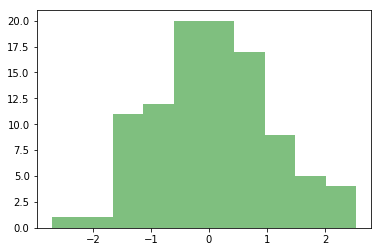

In [10]:
plt.hist(dataset1,color='green',alpha=.5)

(array([0.04606155, 0.04606155, 0.04606155, 0.        , 0.13818466,
        0.09212311, 0.04606155, 0.23030777, 0.27636933, 0.5066771 ,
        0.41455399, 0.32243088, 0.36849244, 0.41455399, 0.23030777,
        0.23030777, 0.13818466, 0.04606155, 0.        , 0.09212311]),
 array([-3.0141372 , -2.74276121, -2.47138522, -2.20000923, -1.92863324,
        -1.65725725, -1.38588126, -1.11450527, -0.84312928, -0.5717533 ,
        -0.30037731, -0.02900132,  0.24237467,  0.51375066,  0.78512665,
         1.05650264,  1.32787863,  1.59925462,  1.87063061,  2.1420066 ,
         2.41338258]),
 <a list of 20 Patch objects>)

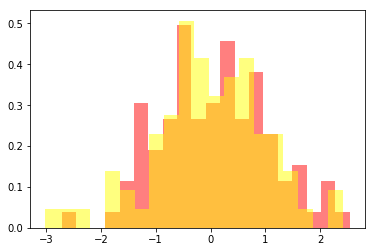

In [15]:
plt.hist(dataset1,normed=True,color='red',alpha=.5,bins=20)
plt.hist(dataset2,normed=True,color='yellow',alpha=.5,bins=20)

LECTURE 49: Kernel Density Estimate Plot

In [1]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [2]:
dataset1 = randn(25)
dataset1

array([ 0.67911678,  0.7628145 ,  2.47382006, -0.60956323, -0.77882065,
       -0.17311267,  1.06507878,  1.4054752 , -0.97673792,  0.36871129,
       -0.94586293, -1.38136336, -0.8677012 , -0.00386572,  0.73447108,
        1.24882045,  2.5571784 ,  1.09398645,  0.81714063,  0.94062904,
        0.47109341, -0.16087723,  0.51071763,  1.49489907,  1.21242691])

(array([1., 5., 0., 3., 3., 5., 4., 2., 0., 2.]),
 array([-1.38136336, -0.98750918, -0.59365501, -0.19980083,  0.19405334,
         0.58790752,  0.98176169,  1.37561587,  1.76947005,  2.16332422,
         2.5571784 ]),
 <BarContainer object of 10 artists>)

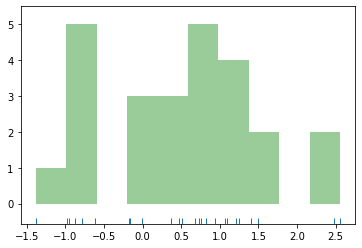

In [3]:
sns.rugplot(dataset1)
plt.hist(dataset1,alpha=.4,color='green')

(0.0, 1.0)

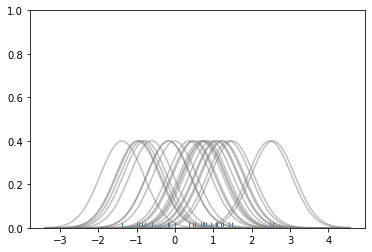

In [29]:
sns.rugplot(dataset1)

x_min = dataset1.min() - 2
x_max = dataset1.max() + 2

x_axis = np.linspace(x_min,x_max,100)

#Ensure that the formula written is proper
bwidth = ((4*dataset1.std()**5)/(3*len(dataset1)))**.2

kernel_list = []

for datapoint in dataset1:
    #to plot a gaussian curve at every point
    kernel = stats.norm(datapoint,bwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for plotting
    kernel = kernel/kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color='grey',alpha=.5)
    
plt.ylim(0,1)

Text(0.5, 1.0, 'Sum of all Gaussian functions')

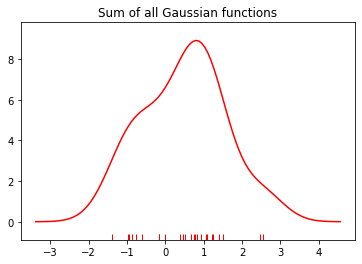

In [41]:
sum_of_kernel = np.sum(kernel_list,axis=0)
plt.plot(x_axis,sum_of_kernel,color='red')
sns.rugplot(dataset1,color='red')
plt.title("Sum of all Gaussian functions")

It is easier to plot this following graph using seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions

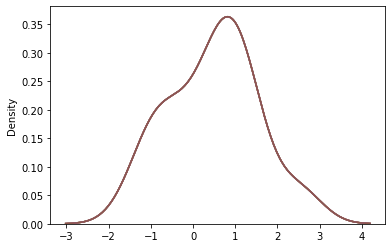

In [46]:
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset1,kernel=kern,label=kern)

In [47]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dataset2

array([[ -0.10873607,  -0.7830564 ],
       [  0.43924935,   1.66351776],
       [ -0.9379077 ,  -2.81769354],
       ...,
       [ -0.13929916,   3.38560369],
       [ -0.6310785 , -11.65815517],
       [ -0.60501793,   8.73409804]])

LECTURE 50: Combining Plot Styles

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

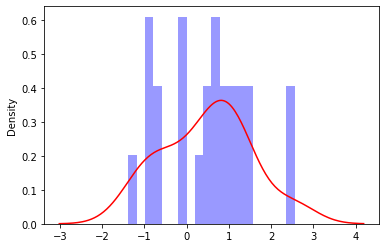

In [56]:
sns.distplot(dataset1,bins=20,
             kde_kws={'color':'red','label':'rugpoint'},
             hist_kws={'color':'blue','label':'Histogram'})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

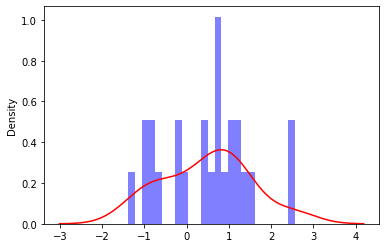

In [61]:
sns.distplot(dataset1,bins=25,
             kde_kws={'color':'red','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM",'alpha':0.5})

LECTURE 51: Box and Violin plots

In [2]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [3]:
data1 = randn(100)
data2 = randn(100) + 2

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

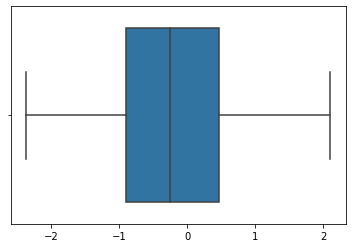

In [4]:
sns.boxplot(data1)

LECTURE 52: Regression plots

In [6]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
tips_data = sns.load_dataset('tips')

In [13]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


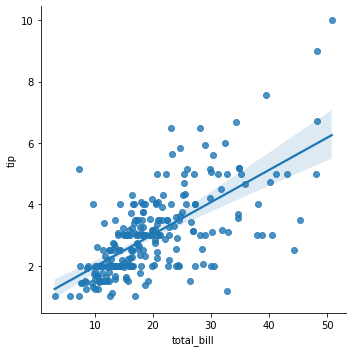

In [15]:
sns.lmplot('total_bill','tip',tips_data)

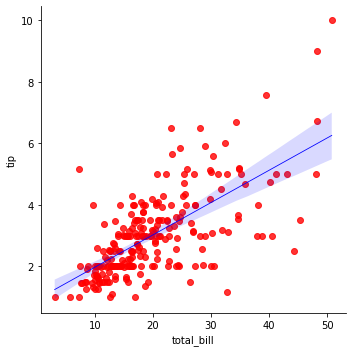

In [18]:
sns.lmplot('total_bill','tip',tips_data,
          scatter_kws={'marker':'*','color':'red'},
          line_kws={'linewidth':.8,'color':'blue'})

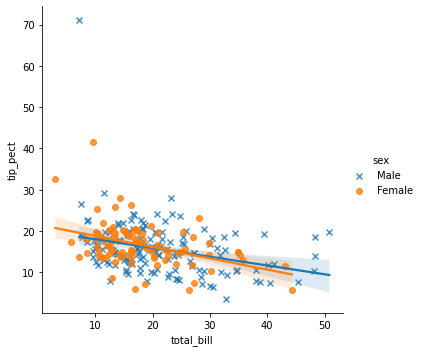

In [23]:
tips_data['tip_pect'] = (tips_data['tip']/tips_data['total_bill'])*100
sns.lmplot("total_bill", "tip_pect", tips_data, hue="sex",markers=["x","o"])

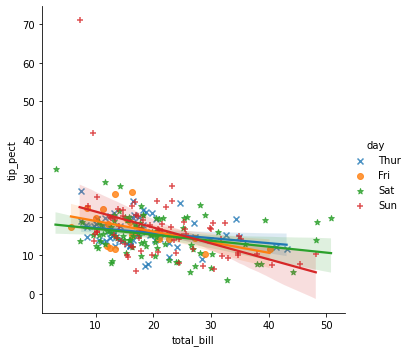

In [45]:
sns.lmplot("total_bill", "tip_pect", tips_data, hue="day",markers=["x","o","*","+"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


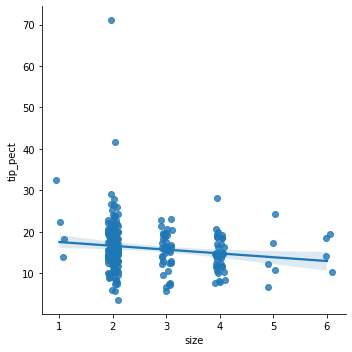

In [46]:
sns.lmplot("size", "tip_pect", tips_data,x_jitter=.1)

In [56]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: 'bool' object has no attribute 'all'

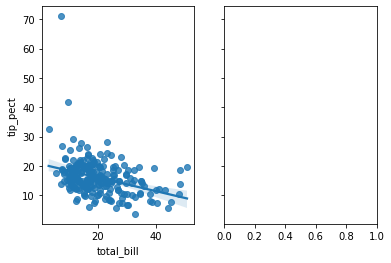

In [60]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey =True) #created double graph
sns.regplot("total_bill","tip_pect",tips_data,ax=axis1) #plots on axis1
sns.violinplot(tips_data.tip_pect,tips_data.size,color='Red_r',ax=axis2)

LECTURE 53: Heatmaps and cluster matrices

In [61]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:
flight_info = sns.load_dataset("flights")
flight_info.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [65]:
flight_pivot = flight_info.pivot('month','year','passengers')
flight_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

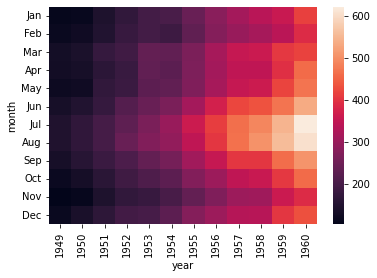

In [68]:
sns.heatmap(flight_pivot)

<AxesSubplot:xlabel='year', ylabel='month'>

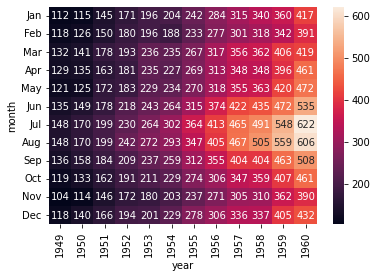

In [76]:
#here 'annot' is used to display value of each color 
#and 'fmt' for the format in which it is to be displayed.(binary,decimal etc)
sns.heatmap(flight_pivot,annot=True,fmt='d')

<AxesSubplot:xlabel='year', ylabel='month'>

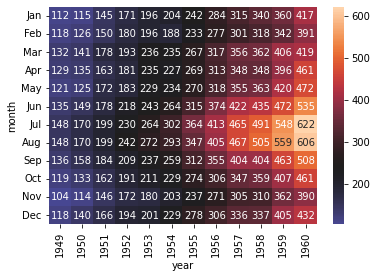

In [80]:
#for multiple color heatmaps
sns.heatmap(flight_pivot,center=flight_pivot.loc['Jan',1955],annot=True,fmt='d')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='month'>

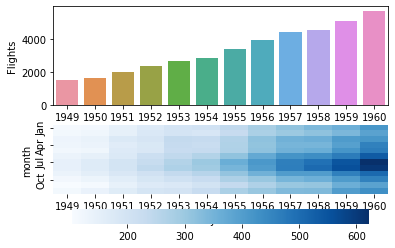

In [116]:
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_pivot.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']



# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_pivot,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"})